#### NCSU GIS 714: Geospatial Computation and Simulations

## Data simulation: Part 1

Contents:
* Start GRASS GIS
* Simple Deterministic Surfaces: Planes and Waves
* Stochastic Surfaces

Additional Resources:
    
* [
GRASS GIS overview and manual](http://grass.osgeo.org/grass74/manuals/index.html)
    
* [GRASS book](http://www.grassbook.org/)

Tip: While executing this notebook, you can launch the GUI in the command line interface with `g.gui`. As you create rasters here, they will appear in the GUI where you can render them, view other layers, etc.

#### Start GRASS GIS

In [1]:
import os
import subprocess
import sys

# Ask GRASS GIS where its Python packages are.
# FOR WINDOWS:
grass_call = "grass80"
# FOR MAC/LINUX
#grass_call = "grass"
sys.path.append(
    subprocess.check_output([grass_call, "--config", "python_path"], text=True, shell=True).strip()
)

# Import GRASS packages
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
gj.init("../../../../grassdata", "nc_spm_08_grass7", "PERMANENT")

# Make a new mapset for this assignment
gs.run_command("g.mapset", mapset="HW2_data_simulation", location="nc_spm_08_grass7", flags="c")

### Simple deterministic surfaces

#### Planes

Create surfaces defined by mathematical functions. First, set region 
to a small rural watershed area at 1m resolution using a predefined region and view our study area:

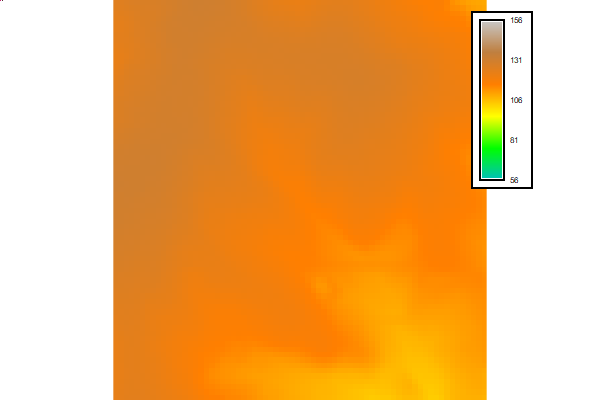

In [2]:
gs.run_command("g.region", region="rural_1m")

# Create GrassRenderer instance
gs.run_command("r.colors", map="elevation", co="elevation")
img = gj.GrassRenderer(use_region=True)
img.d_rast(map="elevation")
img.d_legend(raster="elevation", at=(55, 95, 80, 84), flags="b")
# Display map
img.show()

Using map algebra generate a tilted plane with 20% slope, slightly rotated, with 50m 
offset. Cut off the plane at the crossection with elev_lid792_1m surface,
but let it protrude 2m to make it visible above the surface (see the equation in the lecture):

In [3]:
gs.mapcalc("{y} = 0.02*row()+0.2*col()+50".format(y="tiltplane"))
gs.mapcalc("{y} = if(tiltplane < elev_lid792_1m + 2,tiltplane,null())".format(y="tiltpl_under"))

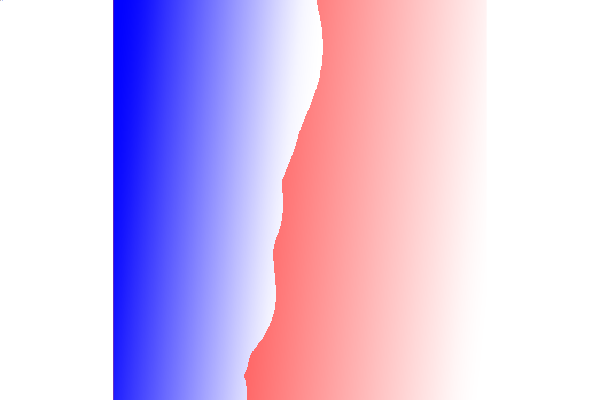

In [4]:
gs.run_command("r.colors", map="tiltplane", co="reds", flags="en")
gs.run_command("r.colors", map="tiltpl_under", co="blues", flags="en")

# Create GrassRenderer instance
# It would be nice if this was 3D
img = gj.GrassRenderer()
img.d_rast(map="tiltplane")
img.d_rast(map="tiltpl_under")
# Display map
img.show()

#### *Question 1*

Generate a plane that crosses the surface along the region diagonal with 10% tilt and protrudes 5m through
the elev_lid792_1m surface. Visualize the plane together with elev_lid792_1m in 3D. Provide the equation
in mathematical and map algebra form.

In [5]:
# YOUR CODE HERE

#### Waves
In the lecture we have shown mathematical surface with hills and valleys generated using the following function:

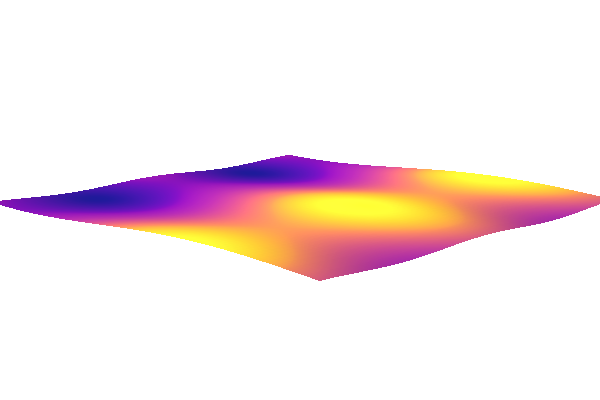

In [6]:
gs.mapcalc("{y} = sin(0.4*row())+0.3*cos(col())+80".format(y="waves"))

gs.run_command("r.colors", map="waves", co="plasma", flags="e")

# Create GrassRenderer instance
# It would be nice if this was tilted differently
img = gj.Grass3dRenderer()
img.render(elevation_map="waves", color_map="waves", perspective=20)
# Display map
img.show()

#### *Question 2*

Using map algebra generate surface with hills, depressions or valleys that is different from the one shown in the lecture,
but is close enough to the elev_lid792_1m surface that you can visualize them together in 3D.

In [7]:
#YOUR CODE HERE

### Stochastic methods

Investiagte impact of noise with different distributions on water flow pattern, watershed and stream 
delineation using random surfaces. Read the manual pages for the relevant commands to understand 
the methods and parameters. 

First we explore different types of random surfaces: uniform with values within the interval [-2,2],
Gaussian distribution around the mean=0 with sigma=0.3, and spatially dependent gaussian distribution with
distance 10m. Then we add these noise surfaces to our elevation surface.

##### Uniform

In [8]:
gs.run_command("r.surf.random", out="uniform", min=-2, max=2)
print(gs.read_command("r.univar", map="uniform"))

total null and non-null cells: 525000
total null cells: 0

Of the non-null cells:
----------------------
n: 525000
minimum: -1.99998
maximum: 2
range: 3.99998
mean: 0.00114379
mean of absolute values: 0.99926
standard deviation: 1.1537
variance: 1.33102
variation coefficient: 100867 %
sum: 600.488462686539



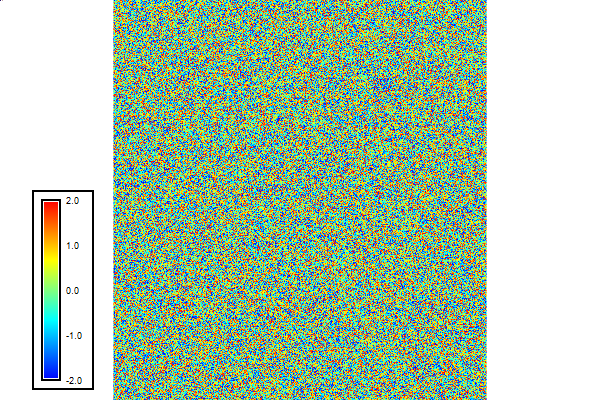

In [9]:
gs.run_command("r.colors", map="uniform", co="bcyr")

img = gj.GrassRenderer()
img.d_rast(map="uniform")
img.d_legend(raster="uniform", at=(5,50,7,10), flags="b")
img.show()

In [10]:
# Add uniform noise to elevation
gs.mapcalc("{c} = {a} + {b}".format(c="elev_lidnoise_uniform", a="elev_lid792_1m", b="uniform"))
gs.run_command("r.colors", map="elev_lidnoise_uniform", co="elevation")

##### Gaussian

In [11]:
gs.run_command("r.surf.gauss", out="gauss_m0_s03", mean=0, sigma=0.3)
print(gs.read_command("r.univar", map="gauss_m0_s03"))

total null and non-null cells: 525000
total null cells: 0

Of the non-null cells:
----------------------
n: 525000
minimum: -1.44504
maximum: 1.34361
range: 2.78865
mean: -7.56696e-05
mean of absolute values: 0.23945
standard deviation: 0.300084
variance: 0.0900506
variation coefficient: -396572 %
sum: -39.7265482833849



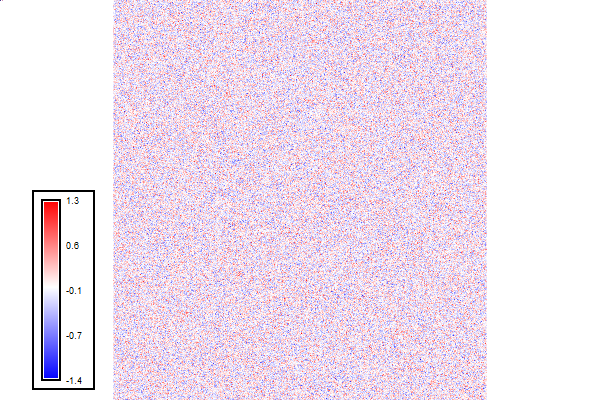

In [12]:
# Render Gaussian raster
gs.run_command("r.colors", map="gauss_m0_s03", co="differences")

img = gj.GrassRenderer()
img.d_rast(map="gauss_m0_s03")
img.d_legend(raster="gauss_m0_s03", at=(5,50,7,10), flags="b")
img.show()

In [13]:
# Add gaussian noise to elevation
gs.mapcalc("{c} = {a} + {b}".format(c="elev_lidnoise_gauss", a="elev_lid792_1m", b="gauss_m0_s03"))
gs.run_command("r.colors", map="elev_lidnoise_gauss", co="elevation")

##### Spatially Dependent Gaussian Distribution

In [14]:
gs.run_command("r.random.surface", output="gauss_spatial_d10", distance=10)
print(gs.read_command("r.univar", map="gauss_spatial_d10"))

total null and non-null cells: 525000
total null cells: 0

Of the non-null cells:
----------------------
n: 525000
minimum: 1
maximum: 255
range: 254
mean: 134.533
mean of absolute values: 134.533
standard deviation: 29.8787
variance: 892.735
variation coefficient: 22.2092 %
sum: 70629602



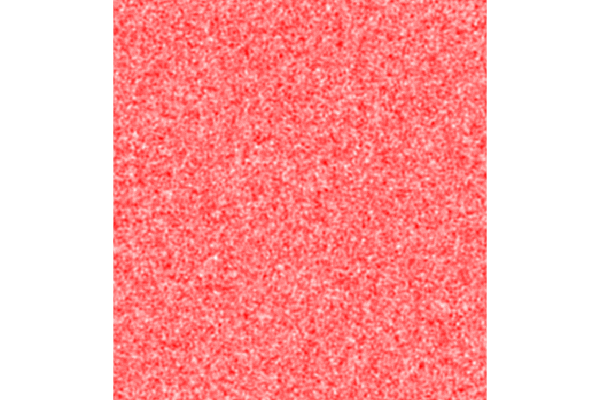

In [15]:
# Render Spatially-Dependent Gaussian raster
gs.run_command("r.colors", map="gauss_spatial_d10", co="differences")

img = gj.GrassRenderer()
img.d_rast(map="gauss_spatial_d10")
img.show()

In [16]:
# Add gaussian noise to elevation
gs.mapcalc("{y} = ({x} - 134.441) * (0.3/254)".format(y="gauss_surfspat", x="gauss_spatial_d10"))
gs.mapcalc("{c} = {a} + {b}".format(c="elev_lidnoise_gspat", a="elev_lid792_1m", b="gauss_surfspat"))

gs.run_command("r.colors", map="elev_lidnoise_gspat", co="elevation")

#### *Question 3*

Can you explain the constants used in the mapcalc command for gauss_surfspat?
Where do these constants come from and why are they needed?

In [17]:
### YOUR ANSWER HERE

#### Comparison

In [18]:
gs.run_command("r.colors", map="elev_lid792_1m", co="elevation")

# Create Interactive Map
fig = gj.InteractiveMap(width = 600, use_region=True)
# Add raster, vector and layer control to map
fig.add_raster("elev_lidnoise_uniform", opacity=1.0)
fig.add_raster("elev_lidnoise_gauss", opacity=1.0)
fig.add_raster("elev_lidnoise_gspat", opacity=1.0)
fig.add_raster("elev_lid792_1m", opacity=1.0)
fig.add_layer_control(position = "bottomright")
# Display map
fig.show()

#### Flow Accumulation Comparison

In [19]:
gs.run_command("r.watershed", elevation="elev_lid792_1m", thresh=5000, accum="accum_5K", drain="draindir_5K", basin="basin_5K", flags="a")
gs.run_command("r.watershed", elevation="elev_lidnoise", thresh=15000, accum="accum_15K_noise", drain="draindir_15K_noise", basin="basin_15K_noise", flags="a")
gs.run_command("r.watershed", elevation="elev_lidnoise_gspat", thresh=10000, accum="accum_10K_noisegspat", drain="draindir_10K_noisegspat", basin="basin_10K_noisegspat", flags="a")

gs.run_command("r.to.vect", input="basin_5K", output="basin_5K", type="area")
gs.run_command("r.to.vect", input="basin_10K_noisegspat", output="basin_10K_noisegspat", type="area")
gs.run_command("r.to.vect", input="basin_15K_noise", output="basin_15K_noise", type="area")

#### *Question 4*
Visualy compare flow accumulation petterns and watersheds derived from elev_lid792_1m, elev_lidnoise, elev_lidnoise_gauss, elev_lidnois_gspat. What can you say about the spatial pattern of flow accumulation derived from these three DEMs?

In [20]:
### YOUR CODE AND ANSWERS HERE

#### *Optional: Question 5*
For quantitative comparison, you can extract selected basins and compare their area using r.report, compute distances between the boundaries, extract streams using r.stream.extract and compare their characteristics using the r.stream* add-ons. 


### Additional Information
* [Website](https://github.com/ncsu-geoforall-lab/geospatial-simulations-course)
    
* [Computing Help](https://help.ncsu.edu/)
    
* [GIST Home](https://geospatial.ncsu.edu/)
    
* [Disclaimer](https://www.ncsu.edu/policies/prr-disclaimer.php)
    
* [Accessibility](https://oit.ncsu.edu/itaccess)

* License: 2018 [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/)
  
* [NCSU GeoForAll Lab](https://geospatial.ncsu.edu/geoforall/)